In [19]:
import pandas as pd
from pathlib import Path
import os
from numpy import *

In [2]:
from tensorflow import keras

In [22]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

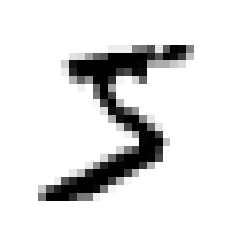

In [6]:
some_digit = X_train[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap='binary')   #imshow()热力图函数负责对图像进行处理，并显示其格式
plt.axis('off')
plt.show()

In [9]:
y_train[0]

5

In [10]:
#训练二元分类器

In [14]:
y_train_5 = (y_train==5)
y_test_5 = (y_test == 5)

In [15]:
from sklearn.linear_model import SGDClassifier

In [50]:
sgd_clf = SGDClassifier(random_state=42)
X_train_2D = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])  #将三维数组转换为二维数组
sgd_clf.fit(X_train_2D,y_train_5)

SGDClassifier(random_state=42)

In [46]:
some_digit = X_train_2D[0]
sgd_clf.predict([some_digit])

array([ True])

In [47]:
#分类器的性能测量：交叉验证、混淆矩阵、精度和召回率、ROC曲线

In [55]:
#交叉验证，K折验证，留1个折叠用于预测准确性

In [49]:
from sklearn.model_selection import StratifiedKFold      #分层抽样
from sklearn.base import clone

In [54]:
skfolds = StratifiedKFold(n_splits=3)
for train_index, test_index in skfolds.split(X_train_2D,y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train_2D[train_index]
    y_train_folds = y_train_5[train_index]
    
    X_test_folds = X_train_2D[test_index]
    y_test_folds = y_train_5[test_index]    
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct/len(y_pred))
    

0.95035
0.96035
0.9604


In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
cross_val_score(sgd_clf,X_train_2D,y_train_5,cv=3,scoring='accuracy') #样本存在偏数据

array([0.95035, 0.96035, 0.9604 ])

In [58]:
from sklearn.base import BaseEstimator

In [64]:
class Never5Classifier(BaseEstimator):               #产生随机结果的分类器作为对比
    def fit(self,X,y=None):
        return self
    def predict(self,X):
        return zeros((len(X),1),dtype=bool)

In [65]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train_2D,y_train_5,cv=3,scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [66]:
#采用混淆矩阵，解决偏数据评估问题